In [1]:
# basic operations
import numpy as np
import pandas as pd


# for visualizations
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
# import csv file
df = pd.read_csv("UMW_ES_reduced.csv", sep=",")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19,20,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
from sklearn.preprocessing import MultiLabelBinarizer

In [5]:
#Define columns of interest
cols_1 = ['original_title', 'royalties_paid_eur']
cols_2 = ['cast', 'genre']
cols = cols_1 + cols_2

In [6]:
#Group by movies and transform labels
df_revenue = df[cols].groupby('original_title')['royalties_paid_eur'].sum()
df_count = df[cols].groupby('original_title')['royalties_paid_eur'].count()

df_movie = df[['original_title'] + cols_2].drop_duplicates()
df_movie = df_movie.fillna('None')
df_movies = []
for col in cols_2:
    mlb = MultiLabelBinarizer()
    df_movie[col] = df_movie[col].str.split(', ')
    temp1 = pd.DataFrame({'revenue':df_revenue, 'count':df_count})
    temp2 = pd.DataFrame(mlb.fit_transform(df_movie[col]), columns=mlb.classes_, index=df_movie['original_title'])
    temp = temp1.join(temp2)
    df_movies.append(temp)

In [7]:
# One-hot dataframe with all starred actors
df_cast = df_movies[0]
df_cast

,revenue,count,Ange Dargent Théophile Baquet Diane Besnier,50 Cent,??? ??????,?????? ???????,??????? ???????,??????? ??????? aka Vtol,???????? ???????,???????? ??????? aka Benzo,...,Álex de Porrata,Ángel de Gracia,Ángel del Río,Élodie Fontan,Émilie Dequenne,Étienne Galloy,Ólafur Darri Ólafsson,Óscar Jaenada,Óscar Mauricio Rodríguez,Özgür Karadeniz
original_title,,,,,,,,,,,,,,,,,,,,,
Mirai no Mirai,484.66,106,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 giorni senza mamma,1492.99,578,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10x10,3302.51,1300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1944,1008.74,343,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1:54,30.94,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zwei Leben,1361.86,520,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
¿Qué te juegas?,1750.04,566,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Äidin toive,25.46,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# One-hot dataframe with all represented genres
df_genre = df_movies[1]
df_genre

,revenue,count,Action & Adventure,African,Anime,Bollywood,Classics,Comedy,Concert Films,Crime,...,Sci-Fi & Fantasy,Short Films,Special Interest,Sports,Suspense,Thriller,Turkish,Urban,War,Western
original_title,,,,,,,,,,,,,,,,,,,,,
Mirai no Mirai,484.66,106,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10 giorni senza mamma,1492.99,578,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10x10,3302.51,1300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1944,1008.74,343,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1:54,30.94,24,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zwei Leben,1361.86,520,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
¿Qué te juegas?,1750.04,566,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Äidin toive,25.46,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
royal_per_genre_median = df_genre.iloc[:, 2:].apply(lambda x:np.median(df_genre['revenue'][x>0]))
royal_per_genre_median = royal_per_genre_median.sort_values()

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


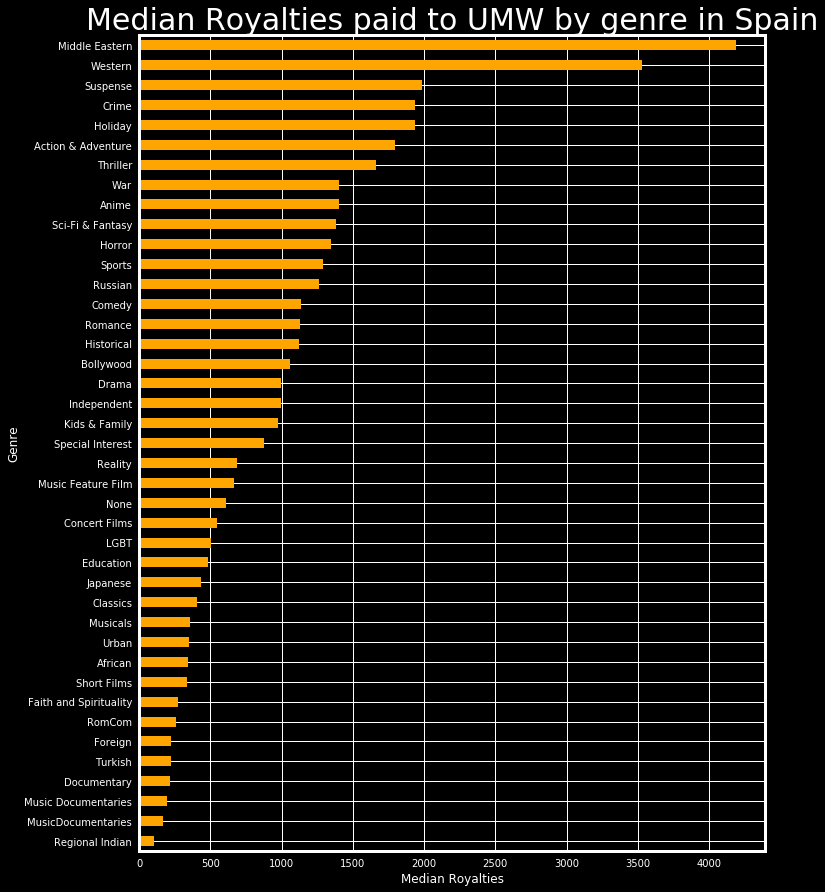

In [10]:
# Median Royalties paid to UMW by genre in Spain (IMDB, December 2019)

plt.style.use('dark_background')
royal_per_genre_median.plot.barh(color = 'orange', figsize = (10, 15))
plt.title('Median Royalties paid to UMW by genre in Spain', fontsize = 30, fontweight = 20)
#plt.yticks(np.arange(50),imdb_boxoffice.Title[0:49], rotation=0)
plt.ylabel('Genre')
plt.xlabel('Median Royalties')
plt.show()

In [11]:
royal_per_actor_median = df_cast.iloc[:, 2:].apply(lambda x:np.median(df_cast['revenue'][x>0]))
royal_per_actor_median = royal_per_actor_median.sort_values(ascending=False)

In [12]:
royal_per_actor_median.head(50)

Emilie Caen               46904.420
Frédéric Chau             46904.420
Noom Diawara              46904.420
Ary Abittan               46904.420
Maddie Ziegler            42877.030
Dane DeHaan               42877.030
Federico Russo            42877.030
Carly Rae Jepsen          42877.030
Anne Le Ny                28674.668
Chantal Lauby             25734.280
Élodie Fontan             24575.975
Medi Sadoun               23645.985
William H. Macy           22498.040
Christopher Walken        22498.040
Emanuela Ionica           21786.775
Antoine Bertrand          19987.800
Gloria Colston            19987.800
Ashley Walters            19987.800
Leo Harlem                19786.020
Jordi Sánchez             19786.020
Berto Romero              19786.020
Isabel Ordaz              19786.020
Alejandro Serrano         19786.020
Stephanie Gil             19786.020
Arturo Valls              19786.020
Bradley Cooper            19710.940
Coffey                    18036.730
Morgan Freeman            16